# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [3]:
# import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


# create your data frames using .read_csv 
highest_vc = pd.read_csv(r'C:\Users\timle\GitHub\Data_Sets\Serial_Killers\edited\Highest_vc.csv')

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

C:\Users\timle\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


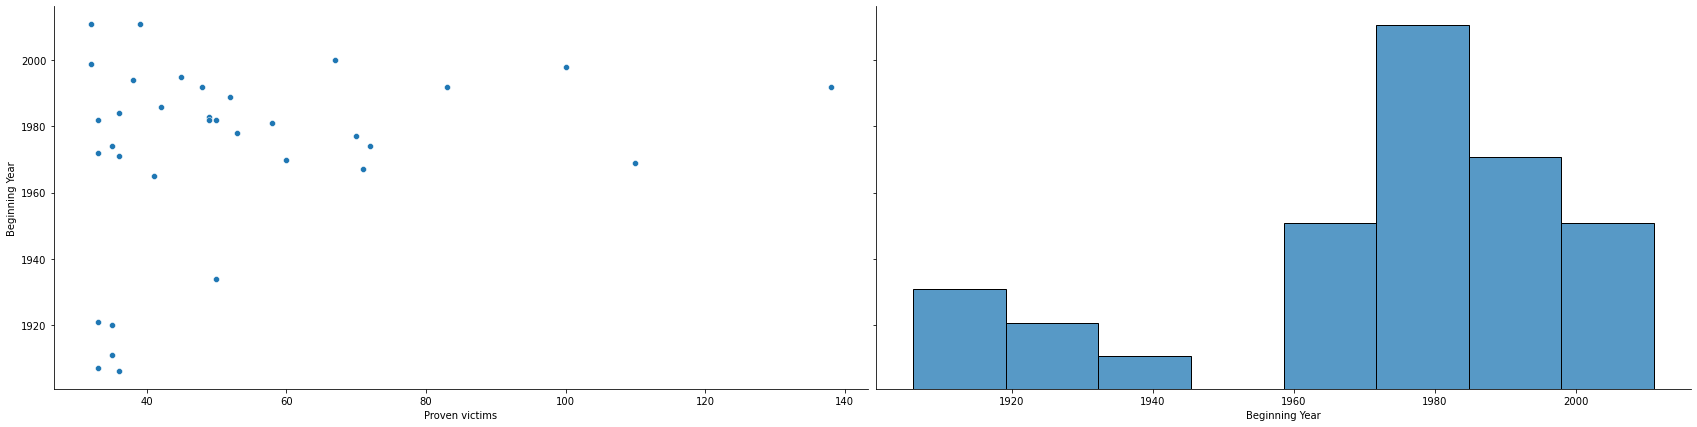

In [5]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(highest_vc, x_vars=['Proven victims', 'Beginning Year'], 
             y_vars='Beginning Year', size=6, aspect=2, kind='scatter')
plt.show()

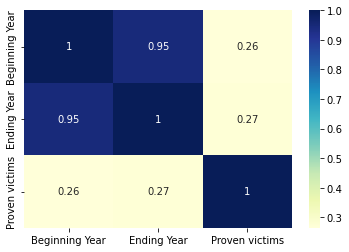

In [6]:
#heatmap of highest_vc data
sns.heatmap(highest_vc.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [8]:
# Step 1 is to assign your x and y
# assign our feature variable/column TV as X and our target variable Sales as y
X = highest_vc['Beginning Year']
y = highest_vc['Proven victims']

In [9]:
# Step 2 is to create your train and test sets

# Splitting the varaibles as training and testing
# split the data by importing train_test_split from the sklearn.model_selection library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [10]:
X_train

0     1992
26    1974
12    1934
11    1989
4     1974
28    1972
27    1911
17    1995
29    1907
14    1983
22    1984
32    1999
21    1994
2     1998
20    2011
10    1978
16    1992
15    1982
23    1971
7     2000
3     1992
24    1906
8     1970
Name: Beginning Year, dtype: int64

In [11]:
y_train

0     138
26     35
12     50
11     52
4      72
28     33
27     35
17     45
29     33
14     49
22     36
32     32
21     38
2     100
20     39
10     53
16     48
15     49
23     36
7      67
3      83
24     36
8      60
Name: Proven victims, dtype: int64

In [12]:
# Step 3 is to build the model. Remember to import any libraries you may need
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

C:\Users\timle\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const            -485.148528
Beginning Year      0.272582
dtype: float64

## Error Terms

Finally, plot your error terms!

In [14]:
#residuals with the predicted y-variable and the y training set
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\timle\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


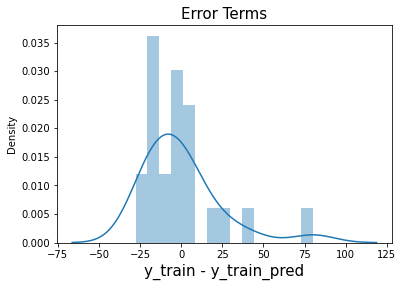

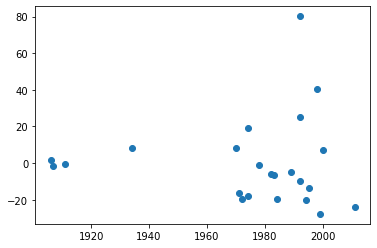

In [16]:
#Import seaborn
import seaborn as sb
#plotting residuals
fig = plt.figure()
sb.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

plt.scatter(X_train,res)
plt.show()

In [17]:
# Add_constant to the test data and predict the y values using the predict attribute present in the statsmodel
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred.head(15)

C:\Users\timle\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


25    38.209448
33    63.014436
30    38.482031
5     51.020816
1     51.565980
13    55.109550
18    56.199879
31    55.109550
19    50.475651
6     53.746638
9     54.836968
dtype: float64

In [18]:
# let’s calculate the R² value for the above-predicted y-values. We can do that by merely importing the r2_score library from
#     sklearn.metrics package

# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

-0.030822424556591566

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? -0.030822424556591566
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? No, you want to have an R-squared above 0.7 and mine is a negative number, so it's VERY far off.
3. Was your plot of the error terms a bell curve? yes